***Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.***


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

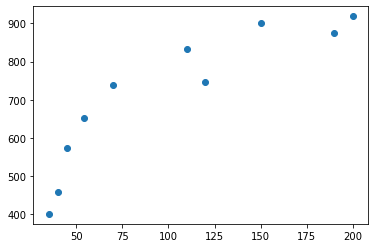

In [2]:
plt.scatter(x, y)
plt.show()

In [3]:
X = x.reshape((10,1))
Y = y.reshape((10,1))

b = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@Y)

print(f'Получаем уравнение вида: y={b[0][0]:.4f}x')

Получаем уравнение вида: y=5.8898x


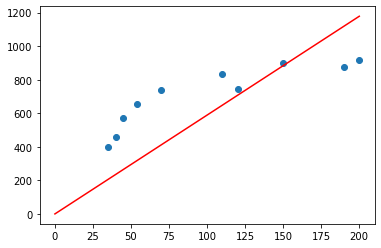

In [4]:
def f1(x_g):
    return b*x_g
    
y_g = np.vectorize(f1)
x_g = np.linspace(0, 200, 10)

plt.plot(x_g, y_g(x_g), 'r-')
plt.scatter(x, y)
plt.show()

In [5]:
n = len(x)

b = (n*(np.sum(x*y)) - (np.sum(x)*np.sum(y))) / (n*(np.sum(x**2)) - ((np.sum(x)**2)))
a = y.mean() -b*x.mean()
print(b, '\n',a)

2.6205388824027653 
 444.17735732435955


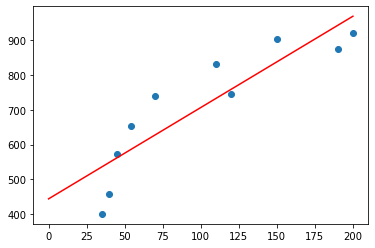

In [6]:
def f2(x_g):
    return b*x_g+a
    
y_g = np.vectorize(f2)
x_g = np.linspace(0, 200, 10)

plt.plot(x_g, y_g(x_g), 'r-')
plt.scatter(x, y)
plt.show()

***Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).***

In [7]:
X = x
Y = y


alpha = 1e-6
b1 = 0.1

for i in range(1000):
    b1 -= alpha*(2/n)*np.sum((b1*X - y)*X)
    if i%100 == 0:
        print(f'Iter.: {i}, b1={b1}')

Iter.: 0, b1=0.25952808
Iter.: 100, b1=5.54537842245223
Iter.: 200, b1=5.868748638669329
Iter.: 300, b1=5.888531320728348
Iter.: 400, b1=5.8897415574471985
Iter.: 500, b1=5.889815595583751
Iter.: 600, b1=5.889820124983314
Iter.: 700, b1=5.889820402076462
Iter.: 800, b1=5.88982041902807
Iter.: 900, b1=5.889820420065112


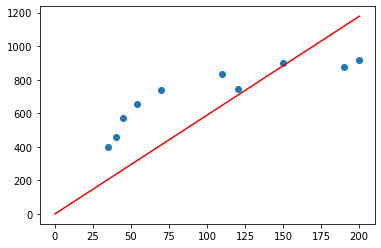

In [8]:
def f3(x_g):
    return b1*x_g
    
y_g = np.vectorize(f3)
x_g = np.linspace(0, 200, 10)

plt.plot(x_g, y_g(x_g), 'r-')
plt.scatter(x, y)
plt.show()

***В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?*** 

Z-таблица используется в случаях нормального распределения с известной $\sigma$ -- среднеквадратичным отклонением, в случаес критерием Стьюдента мы лишь предполагаем, тчто данные имеют нормальное распределения и заранее не знаем сигму.

****4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).***

In [ ]:
alpha = 1e-6
b1 = 0.1
b0 = 0.1

for i in range(1000000001):
    y_p = b0 + b1*X
    b1 -= alpha*(2/n)*np.sum((y_p - y)*X)
    b0 -= alpha*(2/n)*np.sum(y_p - y)
    if i%10000000 == 0:
        print(f'Iter.: {i}, b0={b0}, b1={b1}')

Iter.: 0, b0=0.10139932, b1=0.2595078
Iter.: 10000000, b0=441.3961707581016, b1=2.6410096451636385
Iter.: 20000000, b0=444.15993751058505, b1=2.620667099933888
Iter.: 30000000, b0=444.17724821627576, b1=2.6205396854865035
Iter.: 40000000, b0=444.17735663950225, b1=2.620538887443614
Iter.: 50000000, b0=444.1773572683344, b1=2.620538882815136
Iter.: 60000000, b0=444.1773572683344, b1=2.620538882815136
Iter.: 70000000, b0=444.1773572683344, b1=2.620538882815136
Iter.: 80000000, b0=444.1773572683344, b1=2.620538882815136
Iter.: 90000000, b0=444.1773572683344, b1=2.620538882815136
Iter.: 100000000, b0=444.1773572683344, b1=2.620538882815136
Iter.: 110000000, b0=444.1773572683344, b1=2.620538882815136
Iter.: 120000000, b0=444.1773572683344, b1=2.620538882815136
Iter.: 130000000, b0=444.1773572683344, b1=2.620538882815136
Iter.: 140000000, b0=444.1773572683344, b1=2.620538882815136
